In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("impact.csv")

In [3]:
df.head()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Academic performance
0,W126521129,1,1,1,0,3,2,1,0,2,4,1,1,1,2,1,2,1,3,1
1,W126521130,1,1,1,0,3,2,1,0,2,3,1,1,3,2,0,0,3,2,0
2,W126521131,1,1,1,0,3,0,1,0,2,5,3,0,1,2,0,0,3,1,1
3,W126521132,1,1,1,0,0,0,1,0,1,5,0,0,2,1,2,3,1,0,1
4,W126521133,1,1,1,1,0,0,1,0,3,4,3,1,2,0,0,4,3,1,1


In [4]:
df.astype('object').describe().transpose()

,count,unique,top,freq
Names,564,564,W126521129,1
Age,564,4,1,420
Gender,564,2,1,462
Mobile Phone,564,1,1,564
Mobile Operating System,564,2,0,451
Mobile phone use for education,564,4,3,306
Mobile phone activities,564,4,0,360
Helpful for studying,564,2,1,540
Educational Apps,564,4,0,318
Daily usages,564,4,2,234


In [5]:
X = df.drop(columns = ['Names', 'Mobile Phone', 'Academic performance'])
y = df['Academic performance']

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [7]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [8]:
nb=nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)

Classification report for NB
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        71
           1       0.50      0.58      0.54        69
           2       0.40      0.07      0.11        30

    accuracy                           0.48       170
   macro avg       0.46      0.40      0.39       170
weighted avg       0.47      0.48      0.45       170

confusion_matrix for NB


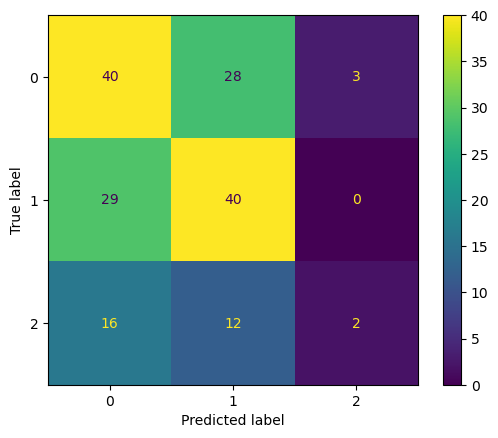

In [9]:

# Evaluate your NB model byt generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for NB")
print(classification_report(y_test,y_pred_nb))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for NB")
nb_cm=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(confusion_matrix=nb_cm,display_labels=nb.classes_)
disp.plot()

In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr=lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [11]:
from sklearn.metrics import classification_report
print("Classification report for LR")
print(classification_report(y_test,y_pred_lr))

Classification report for LR
              precision    recall  f1-score   support

           0       0.51      0.69      0.59        71
           1       0.64      0.62      0.63        69
           2       0.14      0.03      0.05        30

    accuracy                           0.55       170
   macro avg       0.43      0.45      0.42       170
weighted avg       0.50      0.55      0.51       170



confusion_matrix for lr


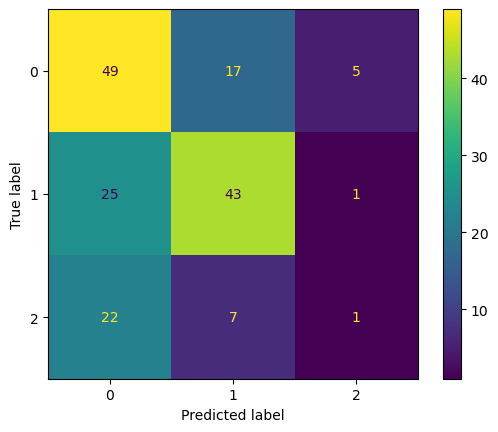

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for lr")
lr_cm=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr.classes_)
disp.plot()

Classification report for DT
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        71
           1       0.81      0.81      0.81        69
           2       0.38      0.17      0.23        30

    accuracy                           0.74       170
   macro avg       0.64      0.63      0.62       170
weighted avg       0.70      0.74      0.71       170

confusion_matrix for DT


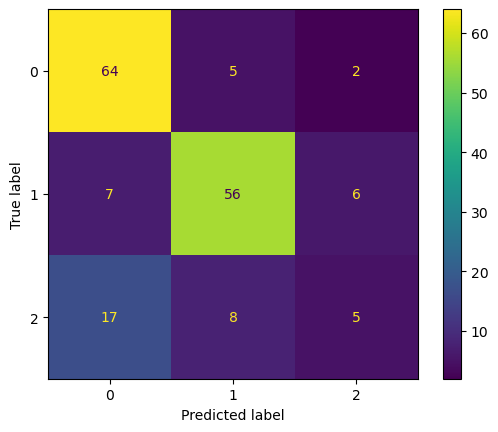

In [13]:
# import the DT algorithm, build the DT model then test it by predicting on the test data
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt=dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

# Evaluate your DT model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for DT")
print(classification_report(y_test,y_pred_dt))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for DT")
dt_cm=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=dt_cm,display_labels=dt.classes_)
disp.plot()

Classification report for Ensmebler
              precision    recall  f1-score   support

           0       0.48      0.76      0.59        71
           1       0.58      0.46      0.52        69
           2       0.00      0.00      0.00        30

    accuracy                           0.51       170
   macro avg       0.35      0.41      0.37       170
weighted avg       0.44      0.51      0.45       170

confusion_matrix for ensember learner


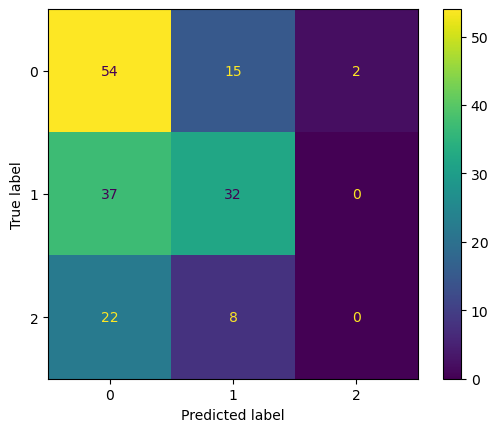

In [14]:
#initiate a new ensemble model
from sklearn.ensemble import VotingClassifier

#create a dictionary of our base learner models
base_learners=[('NB', nb), ('LR', lr)]

#create our voting classifier, inputting our models
ensemble_learner = VotingClassifier(base_learners, voting='hard')

#fit model to training data
ensemble_learner = ensemble_learner.fit(X_train, y_train)
y_pred_ensembler = ensemble_learner.predict(X_test)

# Evaluate your ensemble model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for Ensmebler")
print(classification_report(y_test,y_pred_ensembler))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for ensember learner")
ensemble_learner_cm=confusion_matrix(y_test,y_pred_ensembler)
disp=ConfusionMatrixDisplay(confusion_matrix=ensemble_learner_cm,display_labels = ensemble_learner.classes_)
disp.plot()

Classification report for Ensmebler
              precision    recall  f1-score   support

           0       0.51      0.69      0.58        71
           1       0.60      0.58      0.59        69
           2       0.00      0.00      0.00        30

    accuracy                           0.52       170
   macro avg       0.37      0.42      0.39       170
weighted avg       0.45      0.52      0.48       170

confusion_matrix for ensember learner


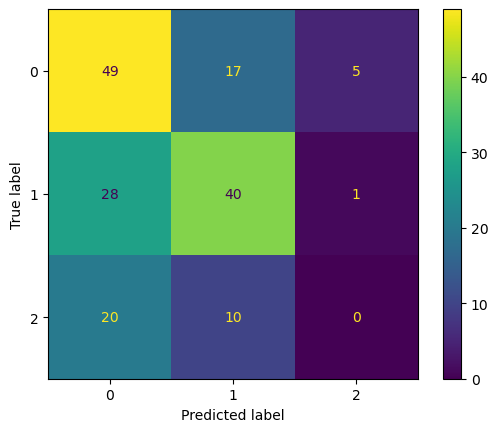

In [15]:
#initiate a new ensemble model
from sklearn.ensemble import VotingClassifier

#create a dictionary of our base learner models
base_learners=[('NB', nb), ('LR', lr)]

#create our voting classifier, inputting our models
ensemble_learner = VotingClassifier(base_learners, voting='soft')

#fit model to training data
ensemble_learner = ensemble_learner.fit(X_train, y_train)
y_pred_ensembler = ensemble_learner.predict(X_test)

# Evaluate your ensemble model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for Ensmebler")
print(classification_report(y_test,y_pred_ensembler))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for ensember learner")
ensemble_learner_cm=confusion_matrix(y_test,y_pred_ensembler)
disp=ConfusionMatrixDisplay(confusion_matrix=ensemble_learner_cm,display_labels = ensemble_learner.classes_)
disp.plot()

{'n_estimators': 100}
Classification report for RF
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        71
           1       0.84      0.81      0.82        69
           2       0.47      0.23      0.31        30

    accuracy                           0.75       170
   macro avg       0.68      0.65      0.65       170
weighted avg       0.73      0.75      0.73       170

confusion_matrix for RF


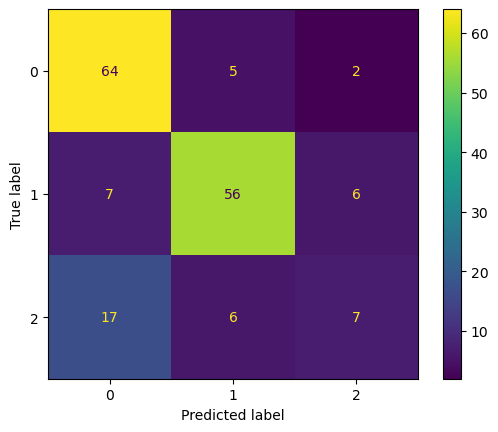

In [16]:
#create a new random forest classifier and grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=10)

#fit model to training data
rf_gs.fit(X_train, y_train)

#save best model
rf_best = rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

#make prediction on the test data
y_pred_rf = rf_best.predict(X_test)

# Evaluate your rf model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for RF")
print(classification_report(y_test,y_pred_rf))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for RF")
rf_cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=rf_cm,display_labels = rf_best.classes_)
disp.plot()

d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.

{'n_estimators': 50}
Classification report for AdaBoost
              precision    recall  f1-score   support

           0       0.61      0.65      0.63        71
           1       0.65      0.65      0.65        69
           2       0.35      0.30      0.32        30

    accuracy                           0.59       170
   macro avg       0.54      0.53      0.53       170
weighted avg       0.58      0.59      0.58       170

confusion_matrix for Adaboost


d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


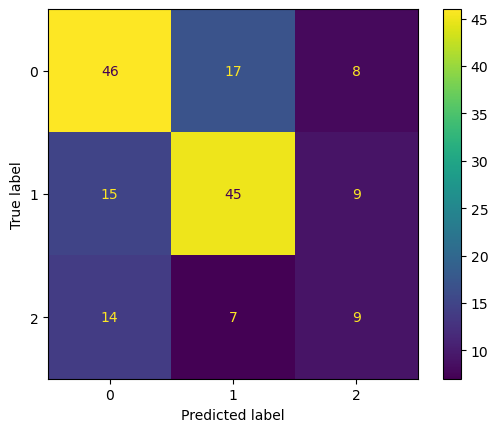

In [17]:
#initiate AdaBoost Classifier 
from sklearn.ensemble import AdaBoostClassifier

#specify the type of weak learner you want to boost, this is called base model
base_model = DecisionTreeClassifier(max_depth=1)
AdaBoost = AdaBoostClassifier(estimator=base_model)

#create a dictionary of all values we want to test for n_estimators
params_AdaBoost = {'n_estimators': [50, 100, 200, 500, 1000]}

#use gridsearch to test all values for n_estimators
AdaBoost_gs = GridSearchCV(AdaBoost, params_AdaBoost, cv=10)

#fit model to training data
AdaBoost_gs.fit(X_train, y_train)

#save best model
AdaBoost_best = AdaBoost_gs.best_estimator_

#check best n_estimators value
print(AdaBoost_gs.best_params_)
#make prediction on the test data
y_pred_AdaBoost = AdaBoost_best.predict(X_test)

# Evaluate your AdaBoost model by generating the classification report and the confusion matrix
from sklearn.metrics import classification_report
print("Classification report for AdaBoost")
print(classification_report(y_test,y_pred_AdaBoost))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("confusion_matrix for Adaboost")
AdaBoost_cm=confusion_matrix(y_test,y_pred_AdaBoost)
disp = ConfusionMatrixDisplay(confusion_matrix=AdaBoost_cm,display_labels = AdaBoost_best.classes_)
disp.plot()